#Question 1:  What does R-squared represent in a regression mode

ans: It represents the proportion of the variance in the dependent variable that is predictable from the independent variables. Values range from 0 to 1.



#Question 2: What are the assumptions of linear regression

ans:Linearity

Independence

Homoscedasticity

Normality of residuals

No multicollinearity

#Question 3:   What is the difference between R-squared and Adjusted R-squared

ans:Adjusted R-squared adjusts the R-squared value based on the number of predictors. It penalizes the addition of irrelevant predictors.

#Question 4:   What do you mean by mean squared error

ans: It penalizes larger errors more than smaller ones, making it sensitive to outliers and useful for optimization during training.



#Question 5:  What does an Adjusted R-squared value of 0.85 indicate

ans: 85% of the variance in the target variable is explained by the predictors, considering the number of predictors used

#Question 6: How do we check for normality of residuals in linear regression

ans: Use histogram, Q-Q plot, or statistical tests like Shapiro-Wilk or Kolmogorov–Smirnov test

#Question 7:  What is multicollinearity, and how does it impact regression

ans: It occurs when predictor variables are highly correlated. It makes coefficient estimates unstable and hard to interpret

#Question 8:  What is Mean Absolute Error (MAE)

ans: The average of the absolute differences between predicted and actual values. It is more robust to outliers than MSE.

#Question 9:  What are the benefits of using an ML pipeline

ans: Reproducibility

Clean code

Efficient model tuning

Reduces data leakage

#Question 10:  Why is RMSE considered more interpretable than MSE

ans: RMSE is in the same unit as the target variable, making it easier to interpret

#Question 11:  What is pickling in Python, and how is it useful in ML

ans: Pickling serializes Python objects. It’s used to save and load ML models.

#Question 12:  What does a high R-squared value mean

ans: A good portion of the variance is explained by the model, but it doesn’t always mean the model is good

#Question 13:  What happens if linear regression assumptions are violated

ans: Coefficient estimates may be biased, and predictions could be inaccurate

#Question 14:  How can we address multicollinearity in regression

ans: Remove correlated features

Use PCA

Use regularization methods like Ridge or Lasso

#Question 15:  How can feature selection improve model performance in regression analysis

ans: Reduces overfitting, improves interpretability, and decreases training time.

#Question 16:  How is Adjusted R-squared calculated

ans: Adj R
2
 =1−(
n−p−1
(1−R
2
 )(n−1)
​
 ),
where n = samples, p = predictors.

#Question 17:   Why is MSE sensitive to outliers

ans: It squares the errors, so large errors get much more weight.

#Question 18: What is the role of homoscedasticity in linear regression

ans: Ensures that the residuals have constant variance; violation leads to inefficient estimates.

#Question 19:  What is Root Mean Squared Error (RMSE)

ans: The square root of the average of squared errors — interpretable in original units.

#Question 20:  Why is pickling considered risky

ans: Pickled files can execute arbitrary code when loaded, posing a security risk.

#Question 21:  What alternatives exist to pickling for saving ML models

ans: joblib

Export to JSON or ONNX

Save in plain CSV (model weights)

#Question 22:   What is heteroscedasticity, and why is it a problem

ans: When the variance of residuals varies with input. It violates regression assumptions and distorts inference.

#Question 23: How can interaction terms enhance a regression model's predictive power?

ans: They allow the model to capture relationships between features that aren't captured by individual variables.

#practicle question

#Question 1:  Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model using Seaborn's "diamonds" dataset.

#Question 2:  Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for a linear regression model.



In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate synthetic regression data
X, y = make_regression(n_samples=200, n_features=1, noise=10, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 109.38746350517553
Mean Absolute Error (MAE): 8.02027094374592
Root Mean Squared Error (RMSE): 10.458846184220109


#Question 3 : Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

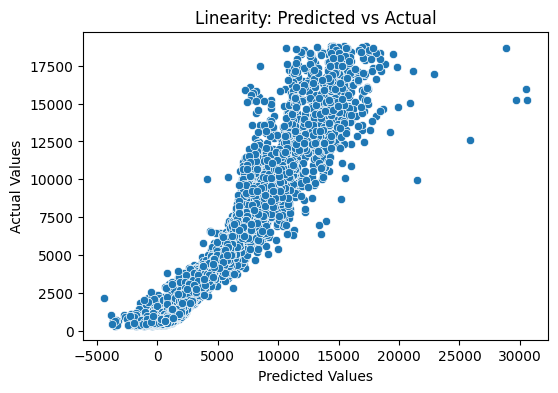

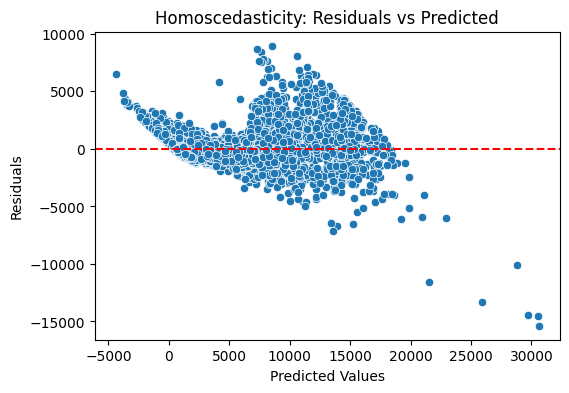

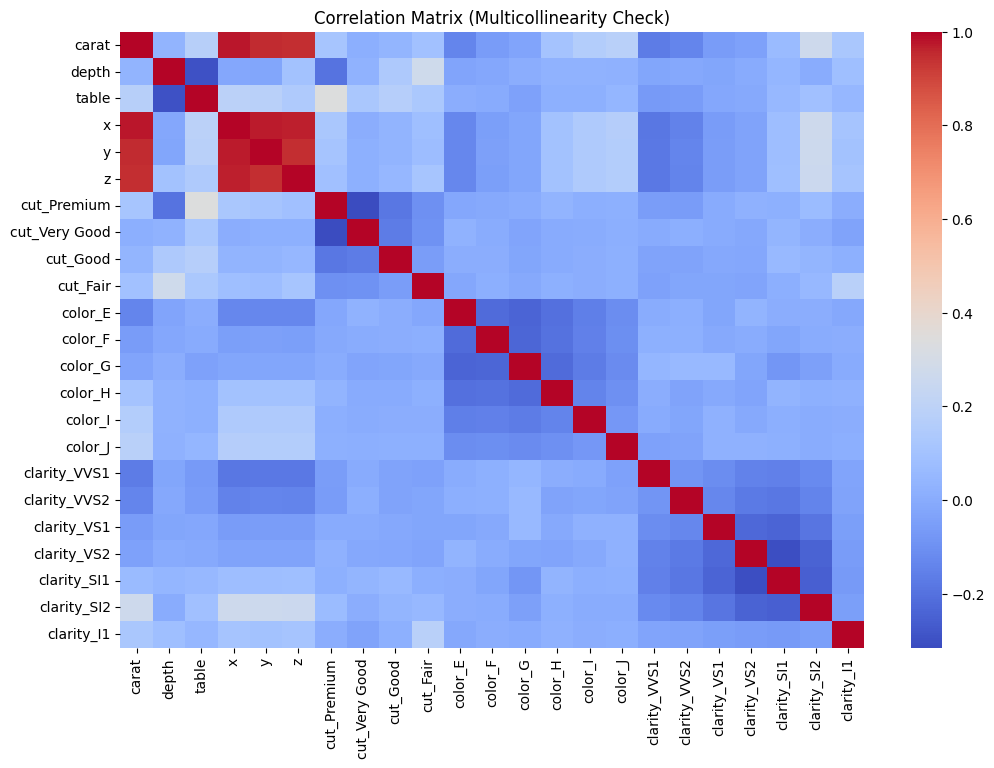

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Load dataset
data = sns.load_dataset("diamonds").dropna()

# Convert categorical variables to numeric using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Features and target
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# -------------------------
# 1. Linearity Check
# -------------------------
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=y_test)
plt.title("Linearity: Predicted vs Actual")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

# -------------------------
# 2. Homoscedasticity Check
# -------------------------
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Homoscedasticity: Residuals vs Predicted")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# -------------------------
# 3. Multicollinearity Check - Correlation Matrix
# -------------------------
plt.figure(figsize=(12, 8))
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix (Multicollinearity Check)")
plt.show()


#Question 4 : Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the performance of different regression models

In [4]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
X, y = make_regression(n_samples=300, n_features=5, noise=15, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Evaluate each model in a pipeline
for name, model in models.items():
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("regressor", model)
    ])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print(f"{name} R² score: {score:.4f}")


Linear Regression R² score: 0.9787
Ridge Regression R² score: 0.9786
Lasso Regression R² score: 0.9785
Random Forest Regressor R² score: 0.9247


#Question 5 :  Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score.

In [6]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data with one feature
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model details
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
print("R-squared Score:", model.score(X_test, y_test))


Coefficient: 44.24418215597419
Intercept: 0.09922221422587718
R-squared Score: 0.9374151607623286


#Question 6 :  Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using simple linear regression and visualizes the results.

Coefficient: 0.10502451738435337
Intercept: 0.9202696135546731
R-squared Score: 0.45661658635167657


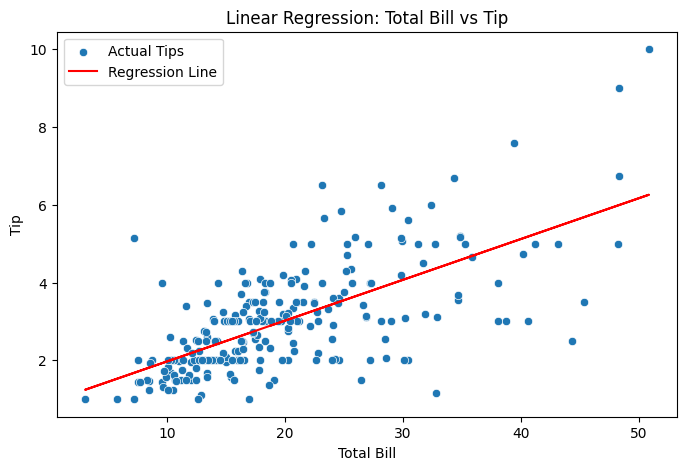

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the 'tips' dataset
tips = sns.load_dataset('tips')

# Define feature and target
X = tips[['total_bill']]
y = tips['tip']

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict tips based on total_bill
y_pred = model.predict(X)

# Print model info
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
print("R-squared Score:", model.score(X, y))

# Visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(x=tips['total_bill'], y=tips['tip'], label='Actual Tips')
plt.plot(tips['total_bill'], y_pred, color='red', label='Regression Line')
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Linear Regression: Total Bill vs Tip")
plt.legend()
plt.show()


#Question 7 : Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line

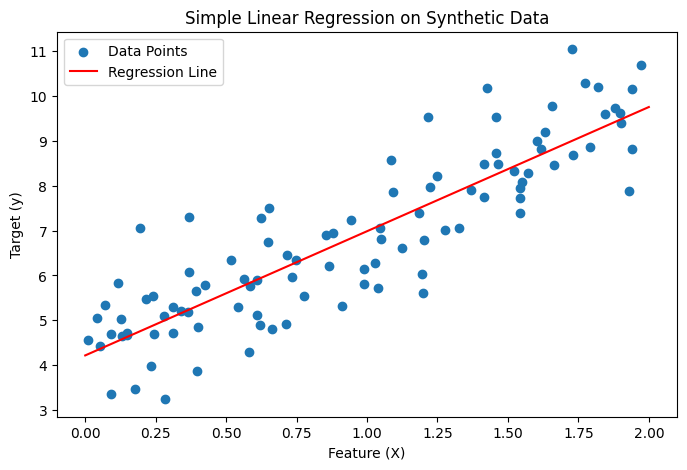

Coefficient: 2.7701133864384837
Intercept: 4.215096157546747


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X.flatten() + np.random.randn(100)

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict new values
X_new = np.linspace(0, 2, 100).reshape(-1, 1)
y_pred = model.predict(X_new)

# Plot original data and regression line
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="Data Points")
plt.plot(X_new, y_pred, color="red", label="Regression Line")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Simple Linear Regression on Synthetic Data")
plt.legend()
plt.show()

# Print model details
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

#Question 8 : Write a Python script that pickles a trained linear regression model and saves it to a file

In [9]:
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X, y)

# Pickle the model
with open("linear_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model has been pickled and saved as 'linear_model.pkl'")


Model has been pickled and saved as 'linear_model.pkl'


#Question 9:  Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression curve

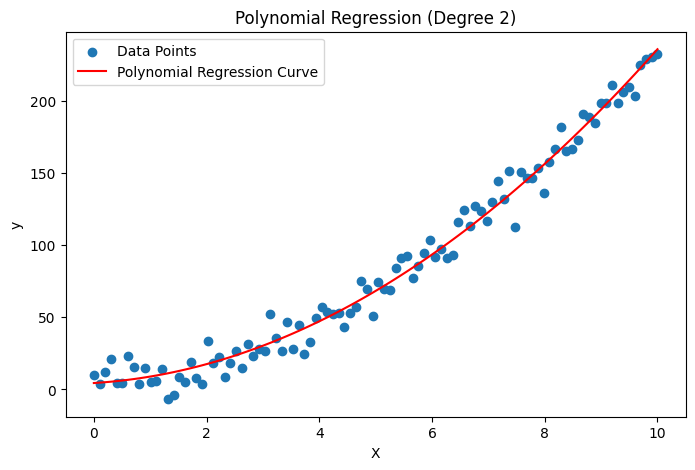

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic quadratic data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X**2 + 3 * X + 5 + np.random.randn(100, 1) * 10

# Transform features to polynomial (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict using the model
y_pred = model.predict(X_poly)

# Plot original data and regression curve
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="Data Points")
plt.plot(X, y_pred, color='red', label="Polynomial Regression Curve")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.show()

#Question 10: Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear regression model to the data. Print the model's coefficient and intercept.


In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = 10 * np.random.rand(100, 1)
y = 5 * X.flatten() + 8 + np.random.randn(100) * 4  # y = 5x + 8 + noise

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Print model parameters
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)


Coefficient: 4.816090709150787
Intercept: 8.860384630186989


#Question 11:  Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and compares their performance.

Degree 1 Polynomial Regression R² Score: 0.8455


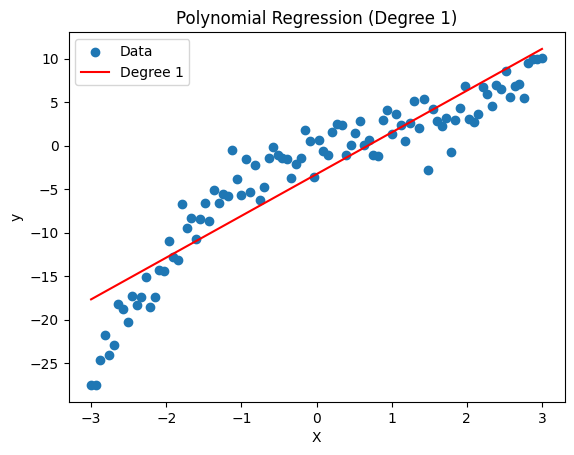

Degree 2 Polynomial Regression R² Score: 0.9281


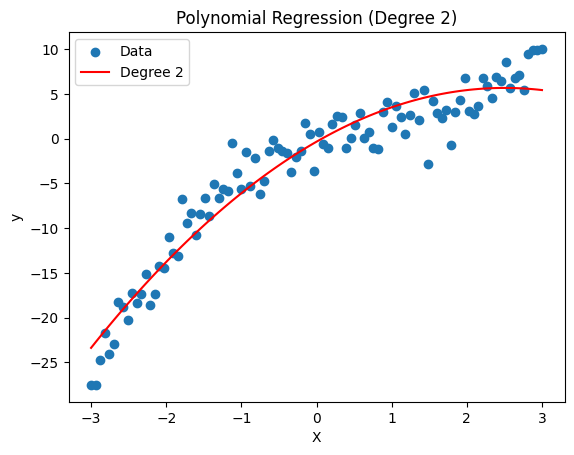

Degree 3 Polynomial Regression R² Score: 0.9630


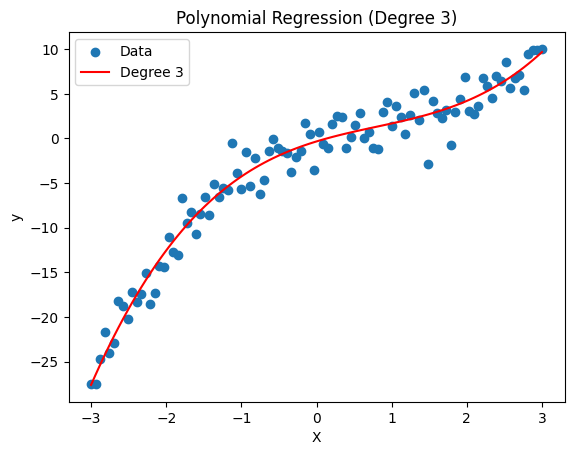

Degree 4 Polynomial Regression R² Score: 0.9634


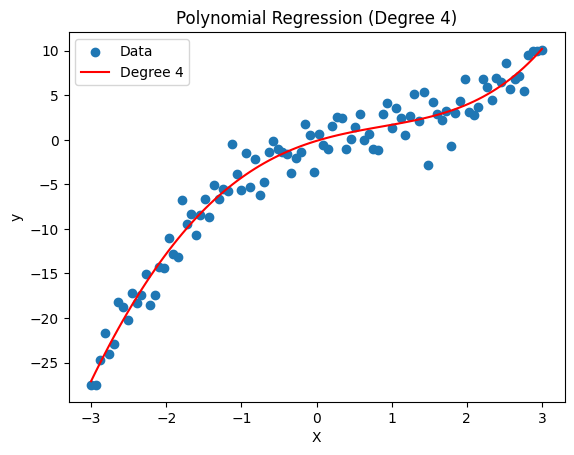

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Generate synthetic nonlinear data
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 0.5 * X**3 - X**2 + 2 * X + np.random.randn(100, 1) * 2

# Compare polynomial models of degree 1 to 4
for degree in range(1, 5):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

    r2 = r2_score(y, y_pred)
    print(f"Degree {degree} Polynomial Regression R² Score: {r2:.4f}")

    # Optional: plot for each degree
    plt.figure()
    plt.scatter(X, y, label="Data")
    plt.plot(X, y_pred, color='red', label=f"Degree {degree}")
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()


#Question 12:  Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, and R-squared score.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Example data (features and target)
# 2 features, 5 samples
X = np.array([
    [1, 2],
    [2, 3],
    [4, 5],
    [3, 6],
    [5, 8]
])
y = np.array([5, 7, 14, 13, 18])

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict to calculate R-squared
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# Print coefficients, intercept, and R-squared
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared:", r2)


Coefficients: [1.9 1. ]
Intercept: 0.9000000000000039
R-squared: 0.9902826855123675


#Question 13: Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the regression line along with the data points.

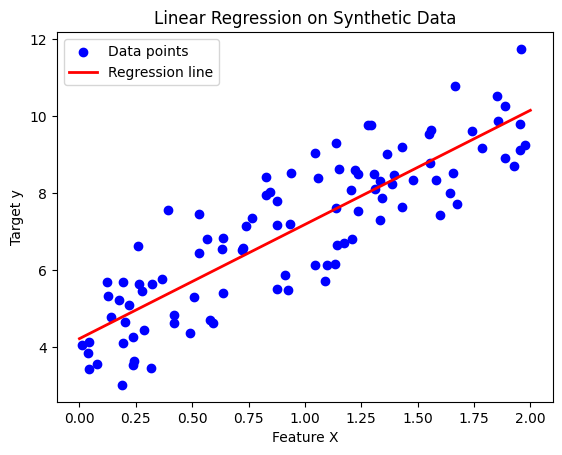

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # 100 samples, single feature
y = 4 + 3 * X.flatten() + np.random.randn(100)  # y = 4 + 3x + noise

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values for the regression line
X_fit = np.linspace(0, 2, 100).reshape(-1, 1)
y_fit = model.predict(X_fit)

# Plot data points and regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_fit, y_fit, color='red', linewidth=2, label='Regression line')
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.title('Linear Regression on Synthetic Data')
plt.legend()
plt.show()


#Question 14: Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features.

In [17]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Original dataset but add tiny noise to break perfect collinearity
data = {
    'Feature1': [1, 2, 3, 4, 5, 6],
    'Feature2': [2, 4, 6, 8, 10, 12],  # Perfectly correlated with Feature1
    'Feature3': [5, 3, 6, 2, 7, 1],
    'Feature4': [7, 5, 8, 4, 9, 3]
}

df = pd.DataFrame(data)

# Add small noise to Feature2 to break perfect collinearity
np.random.seed(0)
df['Feature2'] = df['Feature2'] + np.random.normal(0, 0.01, size=df.shape[0])

# Calculate VIF
X = df.values
vif_data = pd.DataFrame()
vif_data['Feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

print(vif_data)


    Feature            VIF
0  Feature1  144887.694453
1  Feature2  144773.038428
2  Feature3      89.034336
3  Feature4     121.759183


#Question 15:  Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a polynomial regression model, and plots the regression curve.

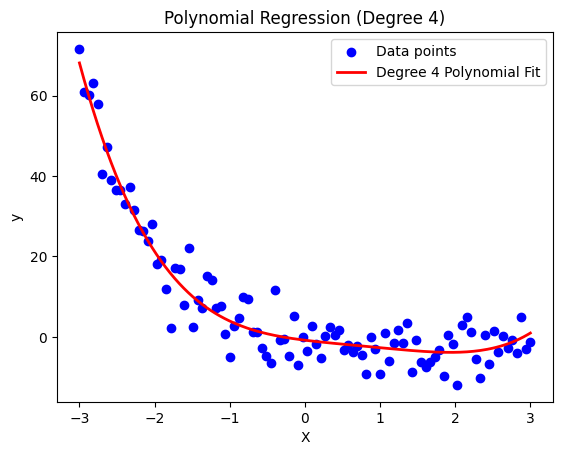

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate synthetic data for a degree 4 polynomial relationship
np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
# True relationship: y = 1 - 2x + 0.5x^2 - x^3 + 0.3x^4 + noise
y = 1 - 2*X.flatten() + 0.5*X.flatten()**2 - X.flatten()**3 + 0.3*X.flatten()**4 + np.random.randn(100)*5

# Create polynomial features (degree 4)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Fit linear regression on polynomial features
model = LinearRegression()
model.fit(X_poly, y)

# Predict on the input range for smooth curve
X_fit = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
X_fit_poly = poly.transform(X_fit)
y_fit = model.predict(X_fit_poly)

# Plot original data points and polynomial regression curve
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_fit, y_fit, color='red', linewidth=2, label='Degree 4 Polynomial Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression (Degree 4)')
plt.legend()
plt.show()


#Question 16: . Write a Python script that creates a machine learning pipeline with data standardization and a multiple linear regression model, and prints the R-squared score.

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Sample data (multiple features)
X = np.array([
    [1, 2, 3],
    [2, 3, 4],
    [4, 5, 6],
    [3, 6, 9],
    [5, 8, 10]
])
y = np.array([6, 9, 15, 18, 23])

# Create pipeline: standardization + linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linreg', LinearRegression())
])

# Fit the pipeline
pipeline.fit(X, y)

# Predict and calculate R-squared
y_pred = pipeline.predict(X)
r2 = r2_score(y, y_pred)

print("R-squared score:", r2)


R-squared score: 1.0


#Question 17: Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the regression curve

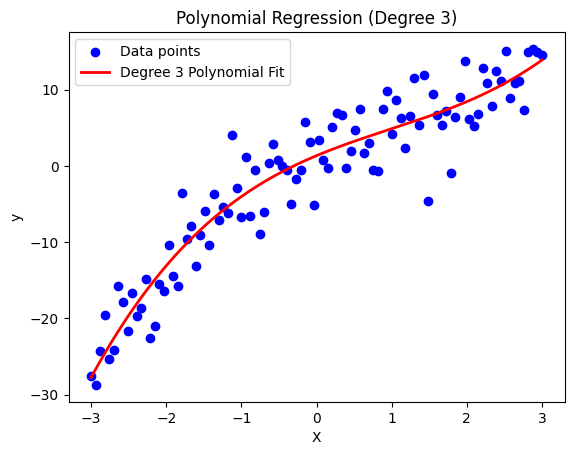

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
# True relationship: y = 2 + 3x - x^2 + 0.5x^3 + noise
y = 2 + 3*X.flatten() - X.flatten()**2 + 0.5*X.flatten()**3 + np.random.randn(100) * 4

# Create polynomial features (degree 3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit linear regression on polynomial features
model = LinearRegression()
model.fit(X_poly, y)

# Predict for a smooth curve
X_fit = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
X_fit_poly = poly.transform(X_fit)
y_fit = model.predict(X_fit_poly)

# Plot data points and regression curve
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_fit, y_fit, color='red', linewidth=2, label='Degree 3 Polynomial Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression (Degree 3)')
plt.legend()
plt.show()


#Question 18:  Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print the R-squared score and model coefficients

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(0)
n_samples = 100
n_features = 5

X = np.random.randn(n_samples, n_features)
# True coefficients
true_coef = np.array([1.5, -2.0, 0.0, 4.0, -3.5])
y = X @ true_coef + np.random.randn(n_samples) * 0.5  # y = X*coef + noise

# Fit multiple linear regression
model = LinearRegression()
model.fit(X, y)

# Predictions and R-squared
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# Print results
print("R-squared score:", r2)
print("Model coefficients:", model.coef_)
print("Intercept:", model.intercept_)


R-squared score: 0.9928317083092946
Model coefficients: [ 1.51489948 -1.96496285  0.10664768  3.99035627 -3.52697072]
Intercept: -0.09008902561105958


#Question 19: . Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the data points along with the regression line.

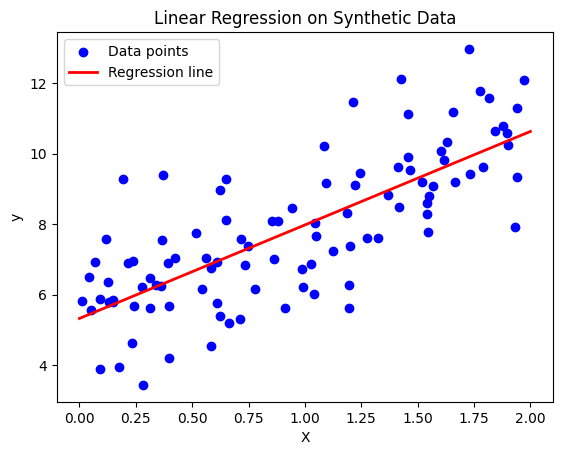

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 samples, single feature
y = 5 + 3 * X.flatten() + np.random.randn(100) * 1.5  # y = 5 + 3x + noise

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values for regression line
X_fit = np.linspace(0, 2, 100).reshape(-1, 1)
y_fit = model.predict(X_fit)

# Plot data points and regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_fit, y_fit, color='red', label='Regression line', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression on Synthetic Data')
plt.legend()
plt.show()

#Question 20:  Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's R squared score and coefficients.

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(1)
n_samples = 100
n_features = 3

X = np.random.randn(n_samples, n_features)
true_coefs = np.array([2.0, -1.5, 3.5])
y = X @ true_coefs + np.random.randn(n_samples) * 0.7  # y = X*coef + noise

# Fit multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict and calculate R squared
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# Print results
print("R-squared score:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


R-squared score: 0.9690670290926002
Coefficients: [ 2.0184749  -1.59444827  3.49630309]
Intercept: -0.005956281744907366


#Question 21: Write a Python script that demonstrates how to serialize and deserialize machine learning models using joblib instead of pickling.

In [24]:
from sklearn.linear_model import LinearRegression
import numpy as np
import joblib

# Create and train a simple model
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8, 10])
model = LinearRegression()
model.fit(X, y)

# Serialize model to a file using joblib
joblib.dump(model, 'linear_model.joblib')

# Deserialize model from file
loaded_model = joblib.load('linear_model.joblib')

# Test loaded model
X_test = np.array([[6], [7]])
predictions = loaded_model.predict(X_test)
print("Predictions:", predictions)


Predictions: [12. 14.]


#Question 22:  Write a Python script to perform linear regression with categorical features using one-hot encoding. Use the Seaborn 'tips' dataset

In [25]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# Load the 'tips' dataset
tips = sns.load_dataset('tips')

# Features and target
X = tips[['sex', 'smoker', 'total_bill', 'day']]
y = tips['tip']

# Identify categorical and numeric columns
categorical_features = ['sex', 'smoker', 'day']
numeric_features = ['total_bill']

# Create ColumnTransformer with OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
    ],
    remainder='passthrough'  # keep numeric features as is
)

# Create a pipeline with preprocessing and linear regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
pipeline.fit(X, y)

# Predict and calculate R-squared on training data
y_pred = pipeline.predict(X)
r2 = r2_score(y, y_pred)

print(f"R-squared score: {r2:.4f}")

# Optional: Print coefficients with feature names
ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(categorical_features)
all_feature_names = list(cat_feature_names) + numeric_features

coefficients = pipeline.named_steps['regressor'].coef_
for name, coef in zip(all_feature_names, coefficients):
    print(f"{name}: {coef:.4f}")

print(f"Intercept: {pipeline.named_steps['regressor'].intercept_:.4f}")


R-squared score: 0.4612
sex_Male: -0.0377
smoker_Yes: -0.1394
day_Sat: -0.1264
day_Sun: 0.0041
day_Thur: -0.0928
total_bill: 0.1057
Intercept: 1.0518


#Question 23 :  Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and R squared score

In [26]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(42)
n_samples, n_features = 100, 5
X = np.random.randn(n_samples, n_features)
true_coefs = np.array([1.5, -2.0, 0.0, 4.0, -3.5])
y = X @ true_coefs + np.random.randn(n_samples) * 1.0

# Fit Linear Regression
linreg = LinearRegression()
linreg.fit(X, y)
y_pred_lin = linreg.predict(X)
r2_lin = r2_score(y, y_pred_lin)

# Fit Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)
y_pred_ridge = ridge.predict(X)
r2_ridge = r2_score(y, y_pred_ridge)

# Print results
print("Linear Regression:")
print(" R-squared:", r2_lin)
print(" Coefficients:", linreg.coef_)
print()

print("Ridge Regression (alpha=1.0):")
print(" R-squared:", r2_ridge)
print(" Coefficients:", ridge.coef_)

Linear Regression:
 R-squared: 0.9780416829692898
 Coefficients: [ 1.55421281 -1.86448897 -0.02129409  4.16074722 -3.50723145]

Ridge Regression (alpha=1.0):
 R-squared: 0.9779447741276379
 Coefficients: [ 1.53730714 -1.8474929  -0.02338484  4.11277561 -3.47851379]


#Question 24 :  Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic dataset.

In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Generate synthetic data
np.random.seed(0)
X = np.random.randn(100, 3)
true_coefs = np.array([2.0, -1.0, 3.5])
y = X @ true_coefs + np.random.randn(100) * 0.5

# Initialize Linear Regression model
model = LinearRegression()

# Perform 5-fold cross-validation and compute R-squared scores
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Cross-validation R-squared scores:", scores)
print("Mean R-squared score:", scores.mean())

Cross-validation R-squared scores: [0.99139046 0.98657234 0.98465778 0.99311229 0.98567603]
Mean R-squared score: 0.9882817815371819


#Question 25 : Write a Python script that compares polynomial regression models of different degrees and prints the R squared score for each

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 1 - 2*X.flatten() + 0.5*X.flatten()**2 - X.flatten()**3 + 0.3*X.flatten()**4 + np.random.randn(100) * 5

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = [1, 2, 3, 4, 5]

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)

    r2 = r2_score(y_test, y_pred)
    print(f"Degree {degree} polynomial regression R-squared: {r2:.4f}")

Degree 1 polynomial regression R-squared: 0.5982
Degree 2 polynomial regression R-squared: 0.8855
Degree 3 polynomial regression R-squared: 0.9315
Degree 4 polynomial regression R-squared: 0.9535
Degree 5 polynomial regression R-squared: 0.9514
